In [24]:
import sounddevice as sd
import matplotlib.pyplot as plt
import numpy as np
from scipy import signal
from scipy.io import wavfile

np.random.seed(0) #define o seed como 0, pois senão colocará valores aleatórios

def add_noise(data, noise_level):
    noise = np.random.normal(size=data.shape) * noise_level
    return data + noise

def threshold(data, thresh):
    data_abs = np.abs(data)
    data_thresh = np.where(data_abs >= thresh, data, 0)
    return data_thresh

def denoise(data, fs, thresh):
    nperseg=120
    win = signal.hamming(nperseg)
    noverlap = 80
    data = data[:,0]#mono
    fftlen = 512
    # _ ignora o retorno.
    _, _, Zxx = signal.stft(data, fs, window=win, noverlap=noverlap, nfft=fftlen, nperseg=nperseg)
    z_thresh = threshold(Zxx, thresh)
    
    _, x = signal.istft(z_thresh, fs, window=win, noverlap=noverlap, nfft=fftlen, nperseg=nperseg)
    return x

In [25]:
fs, data_original = wavfile.read('audio.wav')

print(data_original.dtype)
#data_original = data_original.astype(np.float32) / 32767
sd.play(data_original, fs)

float32


In [26]:
data_noise = add_noise(data_original, 0.01)
sd.play(data_noise, fs)
wavfile.write("audio_com_ruido.wav", fs, data_noise)

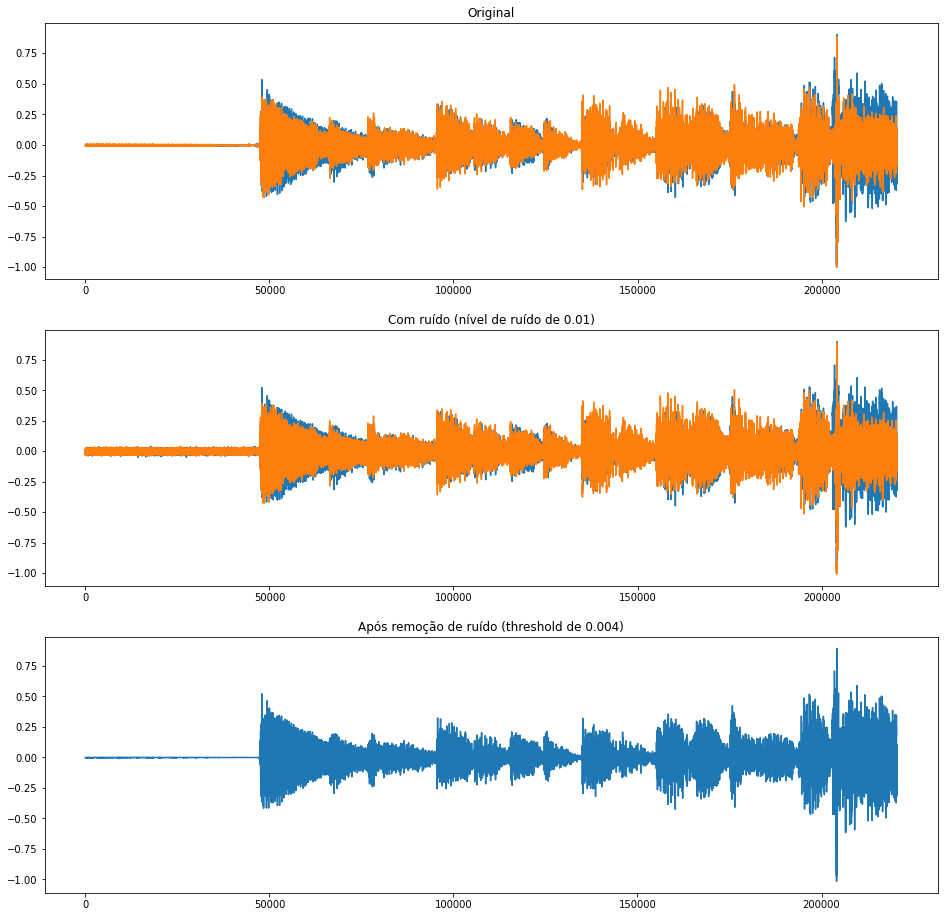

In [29]:
fs, data = wavfile.read("audio_com_ruido.wav")

thresh = 0.004
data_denoise = denoise(data, fs, thresh)
sd.play(data_denoise, fs)


plt.figure(figsize=(16, 16))

plt.subplot(3, 1, 1)
plt.title("Original")
plt.plot(data_original)

plt.subplot(3, 1, 2)
plt.title("Com ruído (nível de ruído de 0.01)")
plt.plot(data_noise)

plt.subplot(3, 1, 3)
plt.title("Após remoção de ruído (threshold de 0.004)")
plt.plot(data_denoise)
